In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install rasterio

import rasterio as rio

     |████████████████████████████████| 19.3 MB 1.4 MB/s 


# Load data

In [3]:
import glob
images = glob.glob('/content/drive/My Drive/MazandaranHeight2' + '/*.tif')

In [4]:
src_files_to_mosaic = []
for filename in images:
    if filename.endswith("tif"):
      img_multi = rio.open(filename)
      src_files_to_mosaic.append(img_multi)


In [ ]:
src_files_to_mosaic

[<open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000000-0000000000.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000000-0000000224.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000000-0000000448.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000000-0000000672.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000000-0000000896.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000224-0000000000.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000224-0000000224.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000224-0000000448.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/BabolHeight2/BabolHeight-0000000224-0

In [5]:
from rasterio.merge import merge

from rasterio.plot import show

In [6]:
mosaic, out_trans = merge(src_files_to_mosaic)

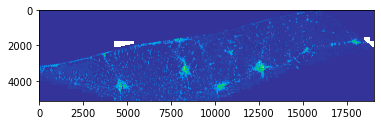

In [7]:
show(mosaic, cmap='terrain')

In [8]:

nRows =  mosaic.shape[1]
nCols =  mosaic.shape[2]
Bands = mosaic.shape[0]
mosaic = mosaic.reshape(nRows,nCols)
with rio.open(
  '/content/drive/My Drive/MazandaranHeight2/02_Mosaic_Mazandaran.tif' ,
  'w',
  driver='GTiff',
  height=nRows,
  width=nCols,
  count=1,
  dtype=mosaic.dtype,
  crs='+proj=latlong',
  transform=out_trans,
) as dst:
  dst.write(mosaic, 1)

In [ ]:
print(mosaic.shape)

(3808, 8960)
